<a href="https://colab.research.google.com/github/Haru1014/Spoon-Knife/blob/main/Sktime_integration_note.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Motivation**


In everyday life, we often encounter scenarios where we want to utilize past data to predict future-related information. `sktime` is a Python library specifically designed for time series analysis, providing powerful and flexible tools for handling and forecasting time series data.

# **Why don't we use scikit-learn?**

Scikit-learn itself does not provide a specialized module for time series forecasting mainly due to some unique challenges and differences between machine learning and time series forecasting tasks. Here are some key reasons:

1. **Temporal Dependency:** In time series forecasting, the order of observations is important as future observations are typically related to past ones. Machine learning algorithms often assume that samples are independently and identically distributed, which is a violation of the temporal dependency inherent in time series data.

2. **Sequential Nature:** Time series data possesses a sequential nature, where the value at a given time depends on the values at previous times. Machine learning models might struggle to capture this sequential aspect as they often ignore the temporal order.

3. **Trends and Seasonality:** Time series data may exhibit trends and seasonality components, which often require special methods for modeling and handling.

4. **Time Index Handling:** Time series data has a time index, and dealing with this time index is crucial for model building and evaluation, necessitating specific considerations and feature engineering.

To address these challenges, specialized libraries and tools for time series forecasting have been developed, such as statsmodels, Prophet, ARIMA models, and others. These tools focus more on the characteristics of time series data and provide effective methods for handling temporal dependencies and sequential patterns.

If your primary task involves time series forecasting, it is recommended to use dedicated time series forecasting libraries. However, if you need to perform general machine learning tasks, scikit-learn remains a powerful and widely-used tool.

**The followng is the eample using scikit-learn.**

Mean Squared Error: 62.204224229017846


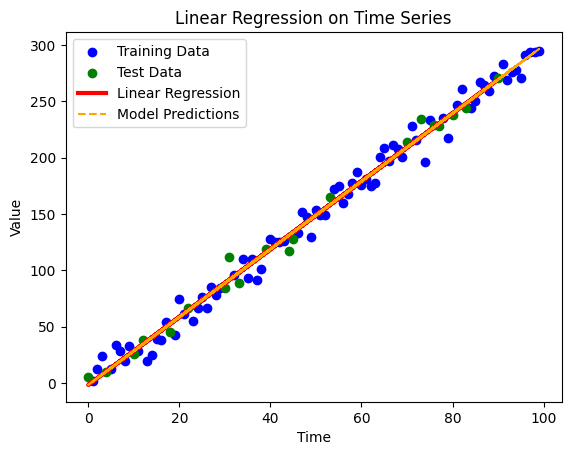

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Generate time series data
np.random.seed(42)
X = np.arange(100).reshape(-1, 1)
y = 3 * X.squeeze() + np.random.randn(100) * 10

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error of the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot the training data and the fitted line of the model
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Test Data')
plt.plot(X_test, y_pred, color='red', linewidth=3, label='Linear Regression')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Linear Regression on Time Series')
plt.legend()

# Add a curve showing the model predictions
plt.plot(np.concatenate([X_train, X_test]), np.concatenate([model.predict(X_train), y_pred]), color='orange', linestyle='--', label='Model Predictions')
plt.legend()

plt.show()


# **What is sktime?**

Sktime is a library for time series analysis in Python. It provides a unified interface for multiple time series learning tasks. Currently, this includes time series classification, regression, clustering, annotation, and forecasting. It comes with time series algorithms and scikit-learn compatible tools to build, tune and validate time series models.
### Features of sktime:

1. **Unified Interface for Time Series Tasks:** `sktime` provides a unified interface for various time series learning tasks, including time series classification, regression, clustering, annotation, and forecasting. This simplifies the complexity of switching between different tasks.

2. **Compatibility with scikit-learn:** Designed to be compatible with scikit-learn, `sktime` allows you to leverage a familiar scikit-learn-style API for time series analysis, combining both specialized and general machine learning methods.

3. **Diverse Time Series Algorithms:** `sktime` includes a variety of time series algorithms, ranging from statistical methods (such as ARIMA, ETS) and machine learning-based approaches (like time series forests) to ensemble methods. This flexibility enables users to choose appropriate algorithms based on the nature of the problem.

4. **Model Combination:** `sktime` emphasizes the importance of model combination, allowing users to enhance predictive performance by combining multiple time series models. This is particularly helpful for addressing different features and complexities in time series data.
5. **Cross-Validation and Evaluation:** `sktime` provides specialized cross-validation strategies for time series data, enabling more accurate model performance evaluation. This helps prevent data leakage and better simulates real-world forecasting problems.

# **What is the relation between scikit-learn and sktime?**

scikit-learn and sktime have some relationship, but there are also distinctions between them. Here are the main connections and differences:

1. **Inheritance Relationship:**
   - **scikit-learn:** scikit-learn is a general-purpose machine learning toolkit designed to handle various machine learning tasks, including classification, regression, clustering, and more. It provides many classical machine learning algorithms and tools with a consistent API.
   - **sktime:** sktime is built on top of scikit-learn, aiming to extend the capabilities of machine learning to handle time series data. Therefore, it can be seen as an extension of scikit-learn into the domain of time series.

2. **Time Series-Specific Features:**
   - **scikit-learn:** While scikit-learn offers some time series-related features, it mainly focuses on general machine learning tasks, lacking specific functionalities tailored for time series data.
   - **sktime:** sktime focuses on time series analysis, providing models, algorithms, and functionalities specifically designed for time series data, making it more convenient when working with time series.

3. **Model Combination:**
   - **scikit-learn:** scikit-learn provides some basic tools for model combination, but there is less emphasis on combining and integrating models for time series data.
   - **sktime:** sktime emphasizes the importance of model combination, offering a framework to combine different time series models to improve predictive performance.

4. **Compatibility:**
   - **scikit-learn:** The API of scikit-learn is widely used and has received extensive support in the machine learning community.
   - **sktime:** sktime is designed to be compatible with scikit-learn, allowing users to take full advantage of the consistency and extensive tools provided by scikit-learn during the sktime usage.

In summary, sktime can be regarded as an extension of scikit-learn into the domain of time series, providing more features and models specifically tailored for time series. If you primarily work with time series data, sktime might be a more suitable choice. If your work is mainly focused on general machine learning tasks, then using scikit-learn may be sufficient.

# **Sktime application**

## **Use sktime to forecast(built-in dataset)**
**Now, let's demonstrate this code using sktime's built-in dataset.**

In [ ]:
pip install sktime

The purpose of executing `pip install sktime` is to install the sktime library. This makes sktime available in your Python environment and allows you to import and utilize the features provided by sktime in your projects.

In the following, we will use the dataset **load_shampoo_sales** to complete the first application

**load_shampoo_sales**:

This dataset describes the monthly number of sales of shampoo over a 3 year period. The units are a sales count.

In [ ]:
from sktime.datasets import load_shampoo_sales
from sktime.utils.plotting import plot_series
y=load_shampoo_sales()
y

Period
1991-01    266.0
1991-02    145.9
1991-03    183.1
1991-04    119.3
1991-05    180.3
1991-06    168.5
1991-07    231.8
1991-08    224.5
1991-09    192.8
1991-10    122.9
1991-11    336.5
1991-12    185.9
1992-01    194.3
1992-02    149.5
1992-03    210.1
1992-04    273.3
1992-05    191.4
1992-06    287.0
1992-07    226.0
1992-08    303.6
1992-09    289.9
1992-10    421.6
1992-11    264.5
1992-12    342.3
1993-01    339.7
1993-02    440.4
1993-03    315.9
1993-04    439.3
1993-05    401.3
1993-06    437.4
1993-07    575.5
1993-08    407.6
1993-09    682.0
1993-10    475.3
1993-11    581.3
1993-12    646.9
Freq: M, Name: Number of shampoo sales, dtype: float64

In [ ]:
type(y)

pandas.core.series.Series


`pandas.core.series.Series` refers to the `Series` class within the `pandas` library in Python. A `Series` is a one-dimensional labeled array, a fundamental data structure in Pandas.

- **pandas.core.series.Series:** This represents a Pandas `Series` object. `pandas.core.series` is a module within the Pandas library, and `Series` is a class within that module. The `Series` class allows the creation and manipulation of one-dimensional data structures, often with labeled indices.

Example:

```python
import pandas as pd

# Creating a Series
data = {'a': 1, 'b': 2, 'c': 3}
series_data = pd.Series(data)

# Displaying the Series
print(series_data)
```

In the example above, `pd.Series(data)` creates a `Series` object containing the data `{1, 2, 3}` with labels `{a, b, c}`. `pandas.core.series.Series` represents the type of this object.

### **Difference between Pandas Series and Python dictionaries**
Pandas Series and Python dictionaries have some similarities, but there are important differences between them. Here are the main distinctions:

1. **Index:**
   - **Pandas Series:** Has an explicit, customizable index, which can be integers, labels, or other data types. This makes the Series more flexible, allowing data retrieval and manipulation based on the index.
   - **Dictionaries:** Keys in a dictionary are unordered and typically strings or numbers. While values can be retrieved by keys, there is no explicit order to the keys.

2. **Order:**
   - **Pandas Series:** Ordered; elements are arranged in the order of the index.
   - **Dictionaries:** Unordered; the order of elements is not guaranteed.

3. **Operations and Methods:**
   - **Pandas Series:** Supports various mathematical operations, statistical methods, and rich data manipulation features. Slicing, filtering, and other operations can be performed using the index.
   - **Dictionaries:** Primarily focused on storing and retrieving key-value pairs, with fewer built-in mathematical and data processing functionalities compared to Pandas Series.

4. **Data Types:**
   - **Pandas Series:** Elements can be of different data types, including integers, floats, strings, etc.
   - **Dictionaries:** Keys and values can be of different data types.

5. **Handling Missing Values:**
   - **Pandas Series:** Has built-in representation for missing values (NaN) and provides methods for handling missing values.
   - **Dictionaries:** Missing values in a dictionary are typically represented by the absence of a key.

Example:

```python
import pandas as pd

# Create a Pandas Series
series_data = pd.Series({'a': 1, 'b': 2, 'c': 3})

# Create a Python dictionary
dict_data = {'a': 1, 'b': 2, 'c': 3}

# Access elements
print(series_data['a'])  # Outputs 1
print(dict_data['a'])    # Outputs 1

# Slicing operation
print(series_data['a':'b'])  # Outputs a slice containing 'a' and 'b'
# Dictionaries do not have a direct slicing operation
```

In summary, Pandas Series provides a more flexible and powerful data structure suitable for a wide range of data processing and analysis tasks, while dictionaries are more suitable for simple key-value pair storage and retrieval.

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Number of shampoo sales'>)

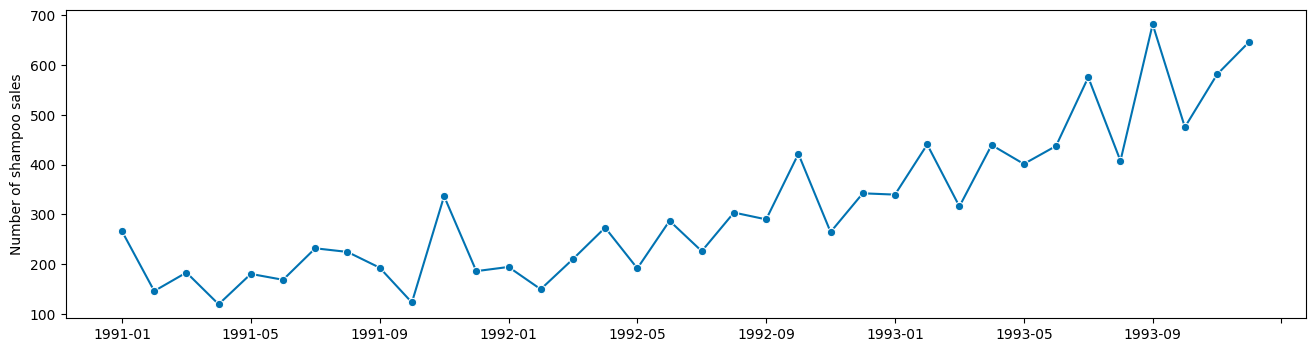

In [ ]:
plot_series(y)

This line of code uses the `plot_series` function from `sktime.utils.plotting` to visualize the time series data represented by the variable `y`. The `plot_series` function creates a plot where the x-axis represents the time index, and the y-axis represents the values of the time series. This helps you visually inspect the pattern and characteristics of the time series data.


In [ ]:
print(y.index)

PeriodIndex(['1991-01', '1991-02', '1991-03', '1991-04', '1991-05', '1991-06',
             '1991-07', '1991-08', '1991-09', '1991-10', '1991-11', '1991-12',
             '1992-01', '1992-02', '1992-03', '1992-04', '1992-05', '1992-06',
             '1992-07', '1992-08', '1992-09', '1992-10', '1992-11', '1992-12',
             '1993-01', '1993-02', '1993-03', '1993-04', '1993-05', '1993-06',
             '1993-07', '1993-08', '1993-09', '1993-10', '1993-11', '1993-12'],
            dtype='period[M]')


The given text represents a `PeriodIndex` object, indicating a series of time periods measured in months. Specifically, it includes monthly periods from '1991-01' to '1993-12'.

Breaking down each part:

- `PeriodIndex` is a Pandas object used to represent a sequence of time periods.
- `['1991-01', '1991-02', ... '1993-11', '1993-12']` lists the specific time periods included in this `PeriodIndex`, with each element representing a month.
- `dtype='period[M]'` indicates that the data type of these time periods is in months.

Therefore, the `PeriodIndex` signifies a range of months from '1991-01' to '1993-12'. This representation is useful in handling time series data as it allows for the organization and analysis of data based on fixed time intervals, such as months.

**Now that we have the data, let's walk through the actual modeling steps step by step.**

## **Step1:ForecastingHorizon**
`ForecastingHorizon` is a class in the sktime library used to represent the forecasting horizon of a time series prediction. This class allows users to explicitly specify the future time points for which the model makes predictions, facilitating evaluation and prediction generation.

In time series forecasting, it's often important to understand at which future time points the model is making predictions. `ForecastingHorizon` provides a convenient way to define these time points. It can be expressed either as an offset relative to the end of the training data (relative horizon) or as a collection of absolute time points (absolute horizon).

**Why do we use forecastinghorizon?**

Using `ForecastingHorizon` in time series forecasting tasks serves several important purposes and provides advantages:

1. **Clear Definition of Prediction Range:** `ForecastingHorizon` allows for a clear definition of the future time points for which the model makes predictions, enabling users to understand the scope of model predictions. This is crucial for planning and evaluating forecasting tasks.

2. **Flexibility:** Through `ForecastingHorizon`, users can choose to work with either a relative horizon (relative to the end of the training data) or an absolute horizon (specific time points). This flexibility allows for easy definition of the prediction time range across different time scales and forecasting requirements.

3. **Model Evaluation:** When assessing time series forecasting models, it's often necessary to specify the time range for evaluation. `ForecastingHorizon` can be passed as an input parameter to evaluation functions, ensuring that evaluation occurs only within the user-defined time range.

4. **Interpretability of Results:** A clear forecasting horizon contributes to the interpretability of the model's prediction results. It enables users to understand which future time points the model has predicted, enhancing comprehension of the model's behavior and performance.

5. **Generation of Future Predictions:** By providing `ForecastingHorizon` as an input to the model, users can generate predictions for future time points. This is valuable for strategic planning, resource allocation, and decision-making.

Overall, using `ForecastingHorizon` enhances the flexibility and interpretability of time series forecasting tasks, simplifying the management and evaluation processes associated with these tasks.

To use `ForecastingHorizon` in sktime, you can follow these general steps:

1.**Import Necessary Libraries:**


In [ ]:
import pandas as pd
from sktime.forecasting.base import ForecastingHorizon

2.**Create a ForecastingHorizon Instance:**

   You can create a `ForecastingHorizon` instance by specifying the time points for which you want to make predictions. This can be done using the `pd.period_range` function or other appropriate time-related functions.


In [ ]:
fh=ForecastingHorizon(pd.period_range("1993-07",periods=6,freq="M"),is_relative=False)
fh

ForecastingHorizon(['1993-07', '1993-08', '1993-09', '1993-10', '1993-11', '1993-12'], dtype='period[M]', is_relative=False)


- `pd.period_range("1993-07", periods=6, freq="M")`: Utilizes the `period_range` function from the pandas library to generate a time range, representing the next 6 months starting from "1993-07". This time range is a pandas `PeriodIndex` object containing specific time points.

- `is_relative=False`: This parameter specifies that it is an absolute horizon, as opposed to a relative horizon with respect to the end of the training data. By setting `is_relative` to `False`, the `ForecastingHorizon` employs absolute time points to represent the prediction time range.

Therefore, this line of code creates a `ForecastingHorizon` instance, `fh`, indicating an absolute time range for the next 6 months starting from "1993-07". This `fh` can be used to specify the time range for model training, evaluation, or generating future predictions.

In [ ]:
cutoff=pd.Period("1993-06",freq="M")

This line of code creates a `Period` object named `cutoff`, representing a specific time point, namely the month of "1993-06". The frequency of this object is set to monthly (`freq="M"`).

In [ ]:
fh.to_relative(cutoff)

ForecastingHorizon([1, 2, 3, 4, 5, 6], dtype='int64', is_relative=True)

This line of code calls the `to_relative` method of the `ForecastingHorizon` object `fh` and passes `cutoff` as a parameter. The purpose of the `to_relative` method is to convert the absolute time points represented in `fh` (related to "1993-06" month) into relative time points with respect to the `cutoff`.

In summary, this code aims to transform the absolute time points represented in the `fh` object (related to the month of "1993-06") into relative time points with respect to "1993-06". This transformation might be helpful for conveniently handling time points in a relative context or for conducting specific analyses.

## **step2:Train-test split**

In [ ]:
from sktime.forecasting.model_selection import temporal_train_test_split
y_train,y_test=temporal_train_test_split(y,fh=fh)
fh

ForecastingHorizon(['1993-07', '1993-08', '1993-09', '1993-10', '1993-11', '1993-12'], dtype='period[M]', is_relative=False)

This code is importing the `temporal_train_test_split` function from sktime's forecasting model selection module and then applies it to split a time series `y` into training (`y_train`) and testing (`y_test`) sets based on a specified forecasting horizon `fh`.

- `temporal_train_test_split`: This function is designed for time series forecasting tasks. It splits a time series into training and testing sets. The split is performed based on a forecasting horizon (`fh`). Data up to the last point in the forecasting horizon is considered as the training set (`y_train`), and the points beyond the forecasting horizon are considered as the testing set (`y_test`).

- `y`: This represents the original time series data that you want to split.

- `fh`: The forecasting horizon that specifies the time range for which predictions are desired.

Therefore, after executing this code, `y_train` will contain the training portion of the time series, and `y_test` will contain the testing portion, based on the provided forecasting horizon. This is a common practice in time series forecasting to assess the model's performance on unseen future data points.

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Number of shampoo sales'>)

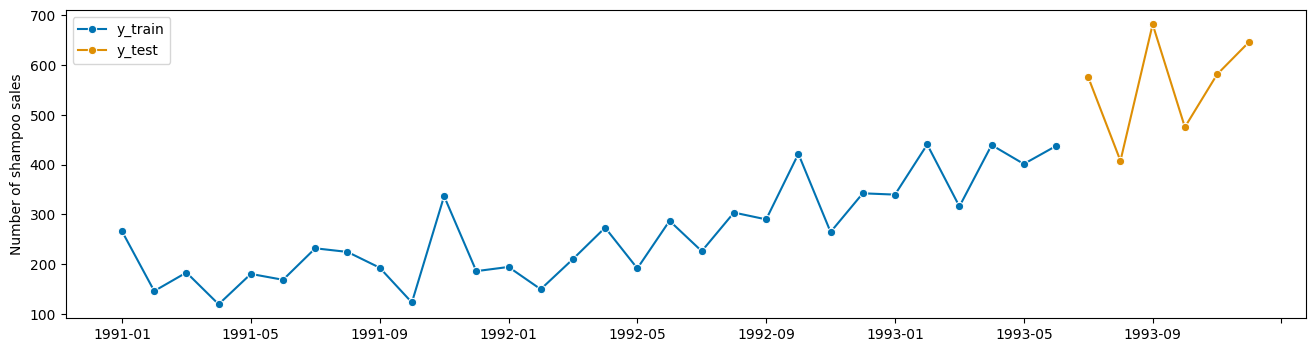

In [ ]:
plot_series(y_train,y_test,labels=["y_train","y_test"])

After executing this code, a plot will be generated showing both the training and testing time series on the same graph, allowing you to visually inspect and compare the two sets. This is commonly done in time series analysis to understand how well a forecasting model generalizes to unseen data.

## **step3:Model specification**

In [ ]:
from sktime.forecasting.naive import NaiveForecaster
#About NaiveForecaster: https://www.sktime.net/en/latest/api_reference/auto_generated/sktime.forecasting.naive.NaiveForecaster.html

`NaiveForecaster` is a simple time series forecasting model within the sktime library. It makes predictions based on naive assumptions without considering more complex time series patterns. `NaiveForecaster` provides different strategies for determining how predictions are generated. Here are some common strategies and their purposes:

1. **"last" Strategy:**
   - This strategy assumes that future values will be the same as the last observed value. It is suitable for time series with trends or seasonality.

   ```python
   forecaster = NaiveForecaster(strategy="last")
   ```

2. **"mean" Strategy:**
   - This strategy assumes that future values will be the same as the mean of historical observations. It is suitable for time series with stationarity.

   ```python
   forecaster = NaiveForecaster(strategy="mean")
   ```

3. **"drift" Strategy:**
   - This strategy assumes that future values will drift along a linear trend, with the slope determined by the average change in historical observations.

   ```python
   forecaster = NaiveForecaster(strategy="drift")
   ```

These strategies are illustrative of the basic functionalities of `NaiveForecaster`. However, in practical applications, it may not be the most accurate or advanced forecasting model. Typically, `NaiveForecaster` is used to quickly establish a baseline model for comparison with more sophisticated time series forecasting models. In some cases, it may also serve as a simple and intuitive forecasting approach.

**And we will use drift strategy.**

In [ ]:
forecaster=NaiveForecaster(strategy="drift",window_length=30)
#drift”: (not robust against NaN values) forecast by fitting a line between the first and last point of the window and
#    extrapolating it into the future

 This line of code creates a forecasting model (`forecaster`) using the `NaiveForecaster` class with the "drift" strategy. The `window_length=10` parameter customizes the behavior of the "drift" strategy by specifying the number of past observations to consider when predicting future values based on a linear trend.

**Principle and Mathematical Formulation Behind NaiveForecaster with "drift" Strategy:**

The "drift" strategy of the `NaiveForecaster` in the `sktime` library is based on the naive assumption of linear drift. This strategy assumes that future values will drift along a linear trend, with the slope determined by the average change in historical observations. Here is a concise explanation of the principle and the corresponding mathematical formulation:

**Principle:**

1. **Linear Trend Drift:**
   - The model assumes that future values will drift along a linear trend. This implies that the future changes in the time series will align with the average change direction observed in historical data.

2. **Slope Determined by Average Change:**
   - The core of the strategy involves calculating the average change in historical observations and using it as the slope for the future trend. This average change is computed as the mean difference between consecutive historical observations.

3. **Simplified Assumption:**
   - The strategy makes a simplified assumption that future trend changes are a linear extension of the average historical change.

**Related Mathematical Formulation:**

Assuming the time series observations are represented as $y_1, y_2, ..., y_t$, where $t$ denotes the time point, the mathematical form of the strategy can be described as:

$ \text{Future Value} = y_t + \text{Average Change} \times \text{Window Length} $

where:
- The average change is calculated as the mean difference between consecutive historical observations.
- The window length represents the length of the historical observation window used to compute the average change.

It is essential to note that this model is quite naive in assuming that future trends will extend linearly from the average historical change. It does not consider other complexities in the time series. In practical applications, this strategy is often used as a baseline model for comparison with more sophisticated forecasting models or when a quick and simple model is needed.

## **step4:Model fit**

In [ ]:
forecaster.fit(y_train)

NaiveForecaster(strategy='drift', window_length=30)

`forecaster.fit(y_train)`  means that the forecasting model is being trained on the historical training data (`y_train`). After this step, the model should be ready to make predictions on new, unseen data or future time points.

## **step5:Prediction**

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Number of shampoo sales'>)

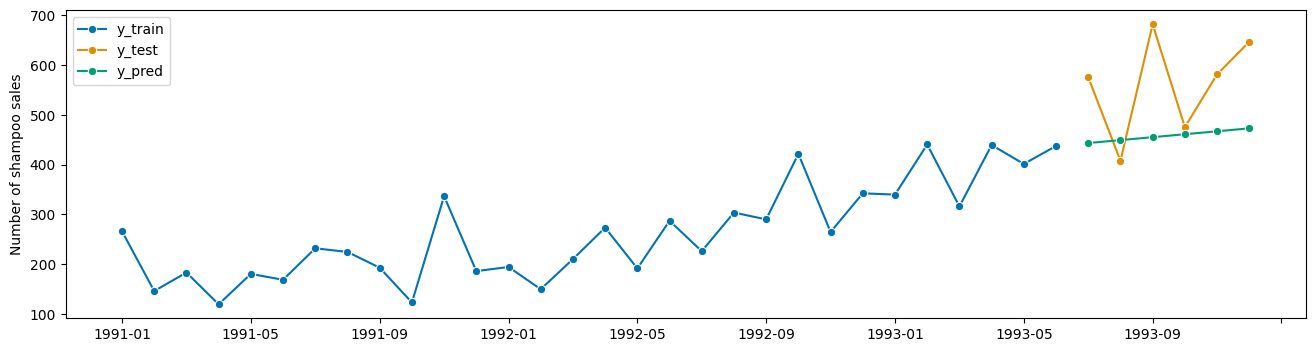

In [ ]:
y_pred=forecaster.predict(fh)
plot_series(y_train,y_test,y_pred,labels=["y_train","y_test","y_pred"])

   - `y_pred = forecaster.predict(fh)`: This line uses the pre-trained `forecaster` model to make predictions for the specified forecasting horizon `fh`. The predicted values are stored in the variable `y_pred`.

**And now we can seee the prediction of what date we have chosen.**

## **step6:Evaluation**

In [ ]:
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test,y_pred,symmetric=False)
#About mean_absolute_percentage_error:https://www.sktime.net/en/latest/api_reference/auto_generated/sktime.performance_metrics.forecasting.mean_absolute_percentage_error.html#sktime.performance_metrics.forecasting.mean_absolute_percentage_error

0.19336726790612135



**Mean Absolute Percentage Error (MAPE):**
MAPE is a common metric used in forecasting to quantify the accuracy of predictions as a percentage of the absolute difference between the predicted and actual values.


$
MAPE = \frac{1}{n} \sum_{i=1}^{n} \left| \frac{A_i - F_i}{A_i} \right| \times 100
$
The formula for Mean Absolute Percentage Error (MAPE) is as follows:


Where:
- $ n $ is the number of data points.
- $ A_i $ is the actual observed value.
- $ F_i $ is the corresponding predicted value.

This formula represents the average absolute percentage error for each observation. MAPE is a commonly used metric for evaluating the accuracy of predictions.

. In general:

1. **MAPE equal to 0%:** Perfect predictions, where all model predictions match actual values exactly.

2. **MAPE between 0% and 10%:** Good predictions, with relatively small errors.

3. **MAPE between 10% and 20%:** Acceptable predictions, with moderate errors.

4. **MAPE exceeding 20%:** High errors, indicating the need for further model improvement or consideration of alternative methods.


Additionally, MAPE has some limitations, especially when actual values are close to or equal to zero, as a zero denominator can make MAPE undefined. Therefore, when evaluating predictive models, other performance metrics such as Root Mean Squared Error (RMSE) or Mean Absolute Error (MAE) may also be considered. The choice of the appropriate metric depends on the characteristics of the problem and business requirements.

## **Use sktime to forecast(csv)**
**Now, let's demonstrate this code using csv file.**

# **Application of sktime forecasting1**
Now let's introduce **Kaggle**.

# **Kaggle**
Kaggle is an online platform centered around data science and machine learning, designed to facilitate collaboration and competition among data scientists, machine learning engineers, and researchers. Here are some key features and functionalities of Kaggle:

1. **Datasets:** Kaggle provides an extensive dataset repository covering various topics. These datasets can be used for training and testing machine learning models.

2. **Competitions:** Kaggle regularly hosts data science competitions known as Kaggle competitions. These competitions offer a platform for data scientists to compete by solving real-world problems. Competition themes include image classification, natural language processing, structured data prediction, and more.

3. **Kernels:** Kaggle allows users to write and share code in a section known as kernels. This enables users to learn and collaborate, and by sharing code in competitions, they can enhance their skills.

4. **Data Scientist Community:** Kaggle has a large and active community comprising data scientists, machine learning experts, and industry professionals. Users can ask questions, share insights, and discuss topics related to data science on the forum.

5. **Learning Resources:** Kaggle provides rich learning resources, including tutorials, courses, and documentation aimed at helping users improve their skills in the fields of data science and machine learning.

6. **Job Opportunities:** Some companies and organizations use Kaggle as a recruitment platform, identifying talented data scientists and machine learning professionals by observing their performance in competitions.

In summary, Kaggle offers data scientists a centralized platform where they can learn, collaborate, compete, and apply their skills to solve real-life problems.

You can download some csv from Kaggle.Here we will use Hospitality Employees - Time Series Dataset.Please click the following link to download the data first.
https://www.kaggle.com/datasets/gabrielsantello/hospitality-employees-time-series-dataset

And you have to unzip it.

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving HospitalityEmployees.csv to HospitalityEmployees.csv


After choosing the data,lets's see the full name of the file.

In [ ]:
#Display uploaded file names
print(list(uploaded.keys()))

['HospitalityEmployees.csv']


In [ ]:
import pandas as pd
import io

file_name = list(uploaded.keys())[0]

data = pd.read_csv(io.BytesIO(uploaded['HospitalityEmployees.csv']),encoding='ISO-8859-1')
#!!!Please notice that the name in the first[] should be the same as the uploaded file names.
data

,Date,Employees
0,1/1/1990,1064.5
1,2/1/1990,1074.5
2,3/1/1990,1090.0
3,4/1/1990,1097.4
4,5/1/1990,1108.7
...,...,...
343,8/1/2018,2019.1
344,9/1/2018,1992.5
345,10/1/2018,1984.3
346,11/1/2018,1990.1



1. `import io`: Imports the `io` module, used to handle binary data in memory.

2. `file_name = list(uploaded.keys())[0]`: This line of code retrieves the name of the uploaded file. Assuming `uploaded` is a dictionary containing information about the uploaded file, `uploaded.keys()` returns a list of all keys, and `list(uploaded.keys())[0]` extracts the name of the first file.

3. `data = pd.read_csv(io.BytesIO(uploaded['HospitalityEmployees (1).csv']), encoding='ISO-8859-1')`: This line of code uses the `pd.read_csv` method to read the CSV file. `io.BytesIO` is employed to wrap the binary data into a file-like object, allowing `pd.read_csv` to process it. `encoding='ISO-8859-1'` specifies the character encoding of the file, a common practice when dealing with files containing non-ASCII characters.

In summary, this code's purpose is to read the uploaded CSV file into a `pandas` `DataFrame` object, which can then be used for data analysis and manipulation.

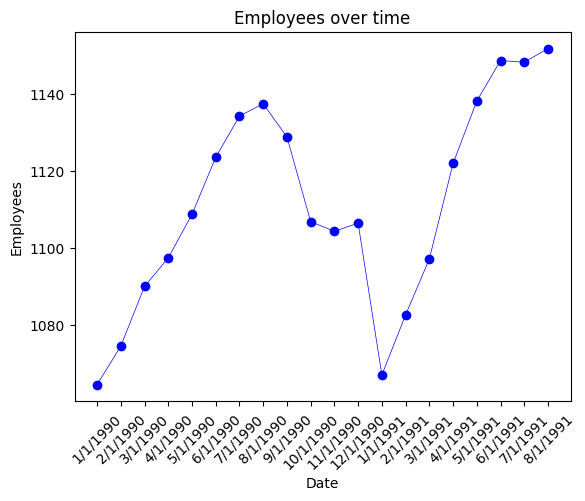

In [ ]:
import matplotlib.pyplot as plt

data= data.head(20)

plt.plot(data['Date'], data['Employees'], marker='o', linestyle='-', color='b',linewidth=0.5)


plt.xlabel('Date')
plt.ylabel('Employees')
plt.title('Employees over time')

plt.xticks(rotation=45)

plt.show()


### **Another way to display the graph.**

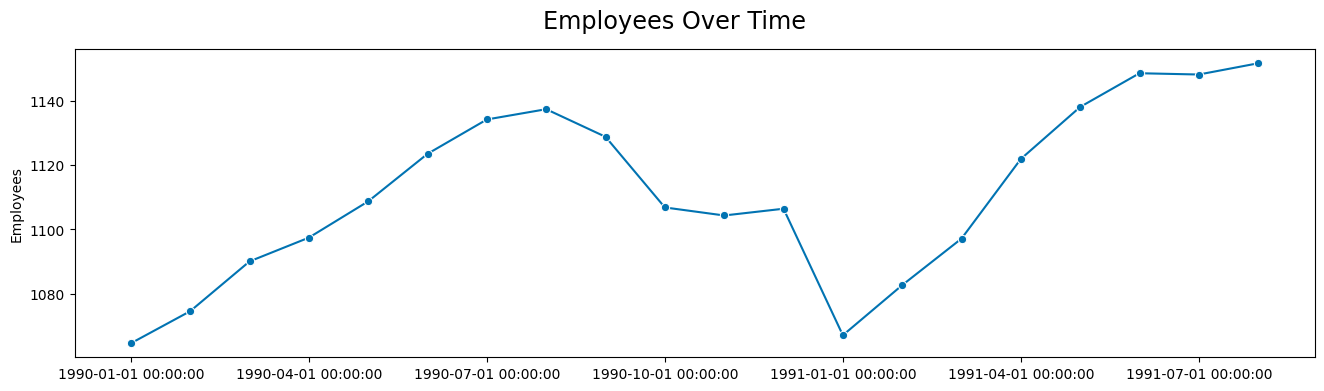

In [ ]:
from sktime.utils.plotting import plot_series
import matplotlib.pyplot as plt

# Retrieve the first 20 records from the DataFrame
data = data.head(20)

# Convert the "Date" column to a time index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Plot the time series data
plot_series(data['Employees'], title='Employees Over Time')

# Display the plot
plt.show()


### Differences:

1. **Library Used:** The first code snippet uses `matplotlib.pyplot` directly for plotting, while the second one leverages the `sktime` library for time series plotting.

2. **Plot Appearance:** The customization options and appearance of the plots may differ. The first code provides more explicit control over plot styling, while the second code relies on the defaults and styles provided by `sktime`.

3. **Data Indexing:** The second code explicitly converts the "Date" column to a time index, which is a common step in time series analysis. The first code assumes a linear x-axis based on the order of the dates.

The last code has helped us complete the data processing

```python
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
```

1. `pd.to_datetime(data['Date'])`: This line uses the `pd.to_datetime` function to convert the "Date" column in `data` to pandas datetime objects. This is helpful for subsequent time series analysis, as datetime objects provide richer support for dates and times.

2. `data.set_index('Date', inplace=True)`: Next, the `set_index` method is used to set the "Date" column as the index of the DataFrame `data`. `inplace=True` indicates that the modification should be done in-place without creating a new object. Setting the index in this way allows for quick retrieval and analysis of time series data based on dates.

In summary, the purpose of this code is to convert the "Date" column to datetime objects and then set it as the index of the DataFrame `data`. This facilitates convenient operations and analyses related to time series data.


**After gaining a general understanding of the details of this dataset, we will now use 'y' to represent the target variable for prediction and proceed with further data processing.**

### **Goal:**
**The variable `y` contains a time series of employee data with dates as the index, and it can be used for further time series analysis or predictive modeling.**

In [ ]:
import pandas as pd

data = pd.read_csv("HospitalityEmployees.csv", header=0)

y = data.set_index('Date')['Employees']
y

Date
1/1/1990     1064.5
2/1/1990     1074.5
3/1/1990     1090.0
4/1/1990     1097.4
5/1/1990     1108.7
              ...  
8/1/2018     2019.1
9/1/2018     1992.5
10/1/2018    1984.3
11/1/2018    1990.1
12/1/2018    2000.2
Name: Employees, Length: 348, dtype: float64

In [ ]:
type(y)

pandas.core.series.Series

The purpose of this code is to read data from a CSV file named "HospitalityEmployees.csv" and create a time series with time as the index. Specifically:

1. `pd.read_csv("HospitalityEmployees.csv", header=0)`: Uses the `read_csv` function from the pandas library to read the data from a CSV file named "HospitalityEmployees.csv". The parameter `header=0` indicates that the first column in the CSV file contains column names.

2. `data.set_index('Date')['Employees']`: Sets the "Date" column as the index of the DataFrame and selects the "Employees" column. After this operation, it creates a time series with dates as the index and corresponding employee data.

In [ ]:
print(y.index)

Index(['1/1/1990', '2/1/1990', '3/1/1990', '4/1/1990', '5/1/1990', '6/1/1990',
       '7/1/1990', '8/1/1990', '9/1/1990', '10/1/1990',
       ...
       '3/1/2018', '4/1/2018', '5/1/2018', '6/1/2018', '7/1/2018', '8/1/2018',
       '9/1/2018', '10/1/2018', '11/1/2018', '12/1/2018'],
      dtype='object', name='Date', length=348)


### **The code results in a data type of 'object,' but this is not the intended outcome.**

In [ ]:
import pandas as pd

# Convert the index to datetime format
y.index = pd.to_datetime(y.index)

# Convert the datetime index to period format
y.index = y.index.to_period()

# Display the transformed index
print(y.index)

PeriodIndex(['1990-01', '1990-02', '1990-03', '1990-04', '1990-05', '1990-06',
             '1990-07', '1990-08', '1990-09', '1990-10',
             ...
             '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08',
             '2018-09', '2018-10', '2018-11', '2018-12'],
            dtype='period[M]', name='Date', length=348)


1. `y.index = pd.to_datetime(y.index)`: Converts the index of the time series from `Period` format to `datetime` format. This conversion is often helpful for additional time series analysis as `datetime` objects provide more date and time-related functionalities.

2. `y.index = y.index.to_period()`: Converts the `datetime` format index back to `Period` format. This conversion might be done to bring the time series back to a fixed time unit, such as months (Period[M]).

3. `print(y.index)`: Displays the transformed index.

### **The result shows that `dtype='period[M]'`.**


**"Why do we need to perform this conversion?"**

In sktime (a Python library for time series analysis), setting the index to `dtype='period[M]'` is primarily done to represent the fixed time unit in which each time point resides, specifically, "Monthly." This is beneficial for many time series forecasting tasks, especially when the prediction target is based on months.

The advantages of setting the index to `dtype='period[M]'` include:

1. **Fixed Time Unit:** This ensures a consistent time interval, i.e., months, between each time point and its adjacent time points.

2. **Convenient Time Calculations:** Using `Period` objects allows convenient calculations involving dates and times, such as computing time differences or performing slicing of time series.

3. **Alignment with Time Series Analysis Requirements:** In time series forecasting, it's often required that the distances between time points are equal, facilitating the model's understanding and capturing of temporal patterns.

In sktime, using a `PeriodIndex` with `dtype='period[M]'` helps ensure that we take into account the structure and relative distances between time points when performing time series forecasting, thereby enhancing the performance of the model.

**After processing the data, we can confidently use the variable 'y' for modeling.The next steps are essentially the same as the ones used with the built-in database earlier.**

## **step1:Forecasting horizon**


In [ ]:
import pandas as pd
from sktime.forecasting.base import ForecastingHorizon
fh=ForecastingHorizon(pd.period_range("3/1/2013",periods=70,freq="M"),is_relative=False)
fh

ForecastingHorizon(['2013-03', '2013-04', '2013-05', '2013-06', '2013-07', '2013-08',
             '2013-09', '2013-10', '2013-11', '2013-12', '2014-01', '2014-02',
             '2014-03', '2014-04', '2014-05', '2014-06', '2014-07', '2014-08',
             '2014-09', '2014-10', '2014-11', '2014-12', '2015-01', '2015-02',
             '2015-03', '2015-04', '2015-05', '2015-06', '2015-07', '2015-08',
             '2015-09', '2015-10', '2015-11', '2015-12', '2016-01', '2016-02',
             '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08',
             '2016-09', '2016-10', '2016-11', '2016-12', '2017-01', '2017-02',
             '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08',
             '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02',
             '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08',
             '2018-09', '2018-10', '2018-11', '2018-12'],
            dtype='period[M]', is_relative=False)

The purpose is to create a forecasting horizon (`fh`) using the `ForecastingHorizon` class from `sktime`.

- `pd.period_range("8/1/2010", periods=20, freq="M")`: This part generates a pandas `PeriodIndex` representing a range of periods starting from August 1, 2010, with a total of 20 periods, and a frequency of "M" indicating monthly.

- `ForecastingHorizon(...)`: This initializes a forecasting horizon object. The `is_relative=False` parameter signifies that the periods specified in the `PeriodIndex` are absolute, not relative to the last observation in the training data.

In summary, the `fh` object represents a forecasting horizon with 20 absolute monthly periods starting from August 1, 2010. This horizon can be used in time series forecasting models to make predictions for future time points.

In [ ]:
cutoff = pd.Period("2/1/2013", freq="M")
fh.to_relative(cutoff)

ForecastingHorizon([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
            52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
            69, 70],
           dtype='int64', is_relative=True)

In [ ]:
print(y.index)

PeriodIndex(['1990-01', '1990-02', '1990-03', '1990-04', '1990-05', '1990-06',
             '1990-07', '1990-08', '1990-09', '1990-10',
             ...
             '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08',
             '2018-09', '2018-10', '2018-11', '2018-12'],
            dtype='period[M]', name='Date', length=348)


## **step2:Train-test split**

In [ ]:
from sktime.forecasting.model_selection import temporal_train_test_split
y_train,y_test=temporal_train_test_split(y,fh=fh)

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Employees'>)

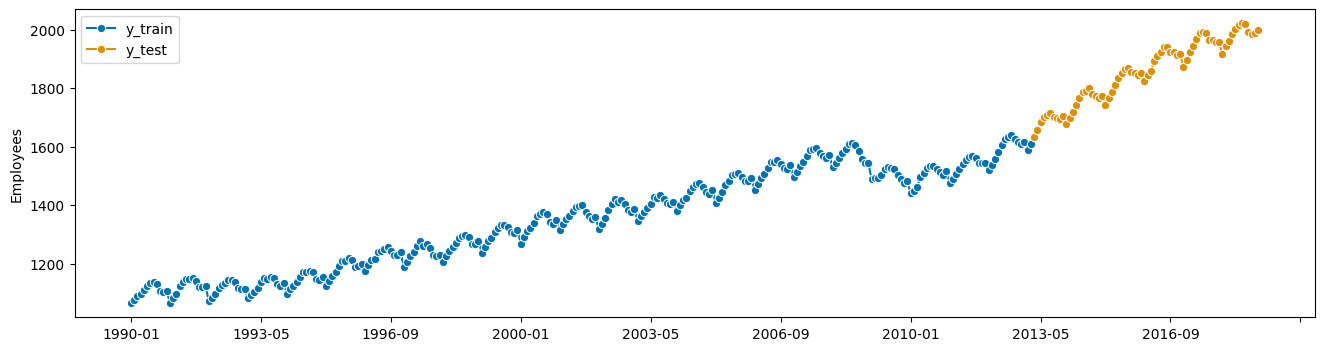

In [ ]:
from sktime.utils.plotting import plot_series
plot_series(y_train,y_test,labels=["y_train","y_test"])

## **step3:Model specification**

In [ ]:
from sktime.forecasting.naive import NaiveForecaster

In [ ]:
forecaster=NaiveForecaster(strategy="drift",window_length=278)

## **step4:Model fit**

In [ ]:
forecaster.fit(y_train)

NaiveForecaster(strategy='drift', window_length=278)

## **step5:Prediction**

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Employees'>)

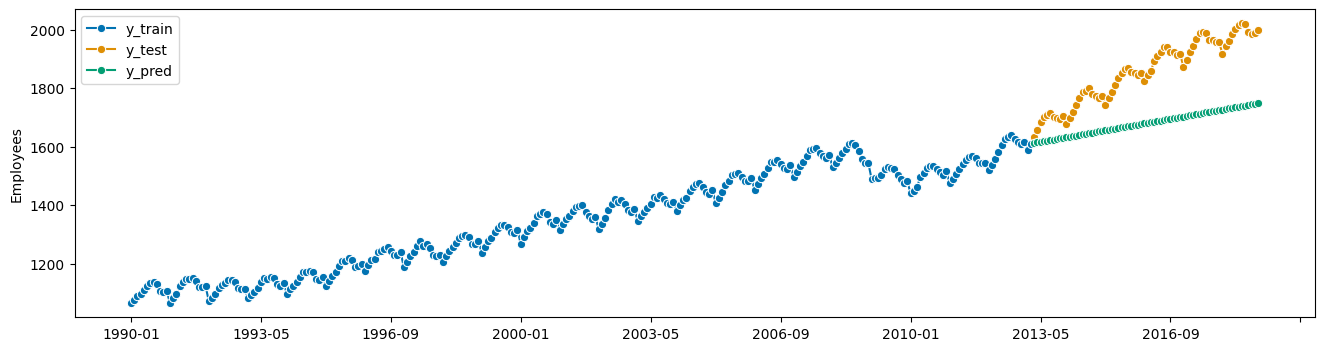

In [ ]:
y_pred=forecaster.predict(fh)
plot_series(y_train,y_test,y_pred,labels=["y_train","y_test","y_pred"])

## **step6:Evaluation**

In [ ]:
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test,y_pred,symmetric=False)

0.09304492872490254

# **Observation:**


**In this prediction, the `window_length` parameter in `forecaster = NaiveForecaster(strategy="drift", window_length=220)` determines the number of data points (from the end of `y_train`) that the forecaster observes. If we change the `window_length` of the training samples to 5, we will observe a larger prediction error (MAPE > 10%).**

# **Application of sktime forecasting2**

In the second application,we will use the data from **Federal Reserve Economic Data.**


"FRED" stands for "Federal Reserve Economic Data," and it is a platform provided by the St. Louis Fed, part of the Federal Reserve System in the United States. FRED offers a comprehensive collection of economic and financial data, covering areas such as employment, inflation, GDP, money supply, interest rates, and more. These data come from various sources, including the Federal Reserve System, federal government agencies, private institutions, and others.

The FRED website allows economists, researchers, investors, and the general public to query, download, and analyze a wide range of economic data. This data is used for economic research, forecasting economic trends, and informing financial and economic policy decisions.

In summary, FRED serves as a vital economic data platform, providing a rich resource for economic research and analysis.

Please download the data as csv file first:https://fred.stlouisfed.org/series/GDP

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving GDP.csv to GDP.csv


In [ ]:
print(list(uploaded.keys()))

['GDP.csv']


In [ ]:
import pandas as pd
import io


file_name = list(uploaded.keys())[0]

data = pd.read_csv(io.BytesIO(uploaded['GDP.csv']),encoding='ISO-8859-1')

data

,DATE,GDP
0,1947-01-01,243.164
1,1947-04-01,245.968
2,1947-07-01,249.585
3,1947-10-01,259.745
4,1948-01-01,265.742
...,...,...
302,2022-07-01,25994.639
303,2022-10-01,26408.405
304,2023-01-01,26813.601
305,2023-04-01,27063.012


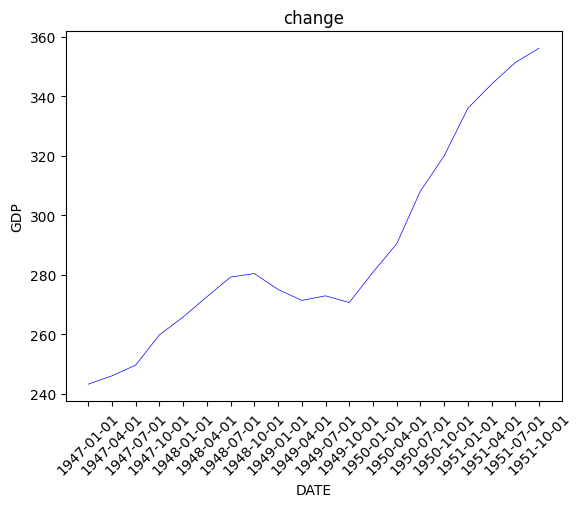

In [ ]:
import matplotlib.pyplot as plt

data= data.head(20)

plt.plot(data['DATE'], data['GDP'], linestyle='-', color='b',linewidth=0.5)

plt.xlabel('DATE')
plt.ylabel('GDP')
plt.title('change')

plt.xticks(rotation=45)

plt.show()

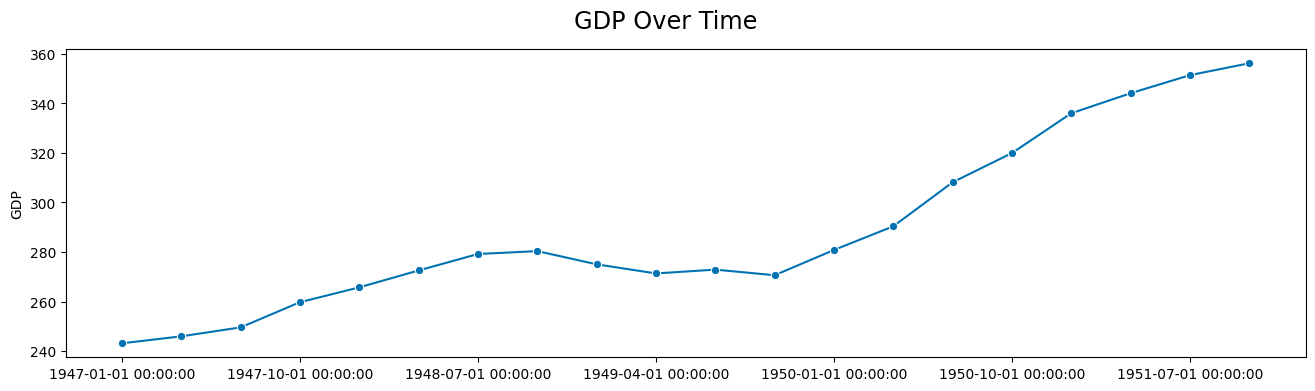

In [ ]:
from sktime.utils.plotting import plot_series
import matplotlib.pyplot as plt

data = data.head(20)

data['DATE'] = pd.to_datetime(data['DATE'])
data.set_index('DATE', inplace=True)
plot_series(data['GDP'], title='GDP Over Time')


plt.show()

In [ ]:
import pandas as pd

data = pd.read_csv("GDP.csv", header=0)

y = data.set_index('DATE')['GDP']
y

DATE
1947-01-01      243.164
1947-04-01      245.968
1947-07-01      249.585
1947-10-01      259.745
1948-01-01      265.742
                ...    
2022-07-01    25994.639
2022-10-01    26408.405
2023-01-01    26813.601
2023-04-01    27063.012
2023-07-01    27644.463
Name: GDP, Length: 307, dtype: float64

In [ ]:
import pandas as pd

y.index = pd.to_datetime(y.index)

y.index = y.index.to_period()

print(y.index)


PeriodIndex(['1947Q1', '1947Q2', '1947Q3', '1947Q4', '1948Q1', '1948Q2',
             '1948Q3', '1948Q4', '1949Q1', '1949Q2',
             ...
             '2021Q2', '2021Q3', '2021Q4', '2022Q1', '2022Q2', '2022Q3',
             '2022Q4', '2023Q1', '2023Q2', '2023Q3'],
            dtype='period[Q-DEC]', name='DATE', length=307)


## **step1:Forecasting horizon**

In [ ]:
import pandas as pd
from sktime.forecasting.base import ForecastingHorizon
fh=ForecastingHorizon(pd.period_range("2011-Q1",periods=51,freq="Q"),is_relative=False)
fh

ForecastingHorizon(['2011Q1', '2011Q2', '2011Q3', '2011Q4', '2012Q1', '2012Q2',
             '2012Q3', '2012Q4', '2013Q1', '2013Q2', '2013Q3', '2013Q4',
             '2014Q1', '2014Q2', '2014Q3', '2014Q4', '2015Q1', '2015Q2',
             '2015Q3', '2015Q4', '2016Q1', '2016Q2', '2016Q3', '2016Q4',
             '2017Q1', '2017Q2', '2017Q3', '2017Q4', '2018Q1', '2018Q2',
             '2018Q3', '2018Q4', '2019Q1', '2019Q2', '2019Q3', '2019Q4',
             '2020Q1', '2020Q2', '2020Q3', '2020Q4', '2021Q1', '2021Q2',
             '2021Q3', '2021Q4', '2022Q1', '2022Q2', '2022Q3', '2022Q4',
             '2023Q1', '2023Q2', '2023Q3'],
            dtype='period[Q-DEC]', is_relative=False)

In [ ]:
cutoff = pd.Period("2010-Q4", freq="Q")
fh.to_relative(cutoff)

ForecastingHorizon([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51],
           dtype='int64', is_relative=True)

## **step2:Train-test split**

In [ ]:
from sktime.forecasting.model_selection import temporal_train_test_split
y_train,y_test=temporal_train_test_split(y,fh=fh)

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='GDP'>)

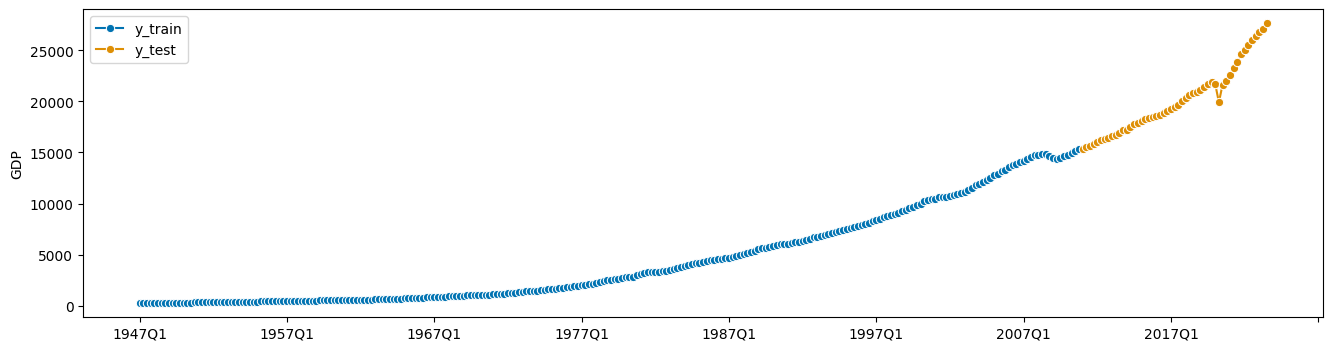

In [ ]:
from sktime.utils.plotting import plot_series
plot_series(y_train,y_test,labels=["y_train","y_test"])

## **step3:Model specification**

In [ ]:
from sktime.forecasting.naive import NaiveForecaster

In [ ]:
forecaster=NaiveForecaster(strategy="drift",window_length=256)

## **step4:Model fit**

In [ ]:
forecaster.fit(y_train)

NaiveForecaster(strategy='drift', window_length=256)

## **step5:Prediction**

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='GDP'>)

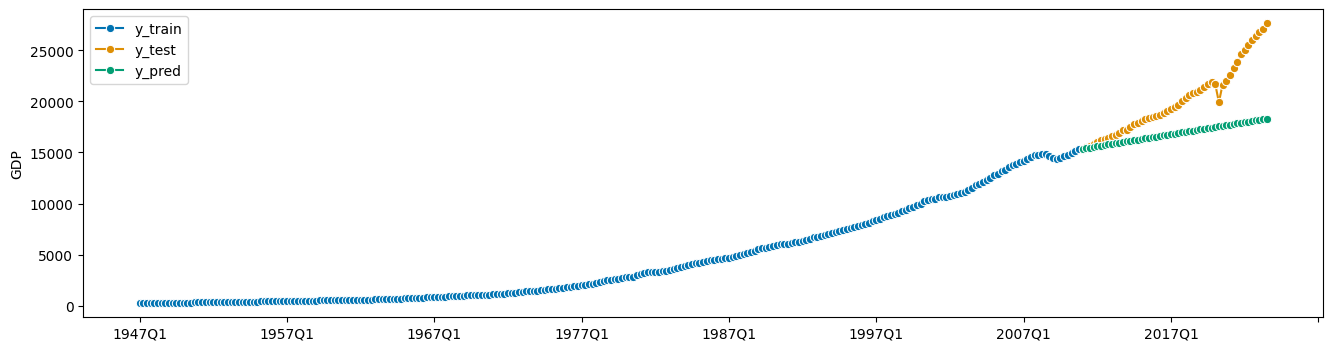

In [ ]:
y_pred=forecaster.predict(fh)
plot_series(y_train,y_test,y_pred,labels=["y_train","y_test","y_pred"])

## **step6:Evaluation**

In [ ]:
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test,y_pred,symmetric=False)

0.14648350764303367

# **Observation**

**By adjusting the number of samples observed by the forecaster, I have observed that the predicted data is generally lower than the actual data. This might suggest that the GDP data is experiencing an increasing rate of growth.**

### **More about drift strategy:**

The "Drift strategy" is a time series forecasting strategy that takes into account the overall trend of the time series. It predicts future observations by assuming that they will drift based on the current observation. The mathematical expression for the Drift strategy is as follows:

$
\hat{y}_{t+1} = y_t + \frac{t - 1}{T}(y_t - y_1)
$

Here, $\hat{y}_{t+1}$ is the predicted value at time $t+1$, $y_t$ is the observed value at time $t$, and $T$ is the length of the current time series.

In essence, the Drift strategy predicts future values by estimating a trend or drift, which is determined by the average growth rate of historical observations. This strategy assumes that future observations will drift based on the current observation's average growth rate.

The Drift strategy is typically used when dealing with time series data that exhibits an overall trend but may not necessarily have a clear seasonality. It provides a simple way to consider the trend without resorting to more complex models. However, in the presence of complex seasonality or other structural patterns in the data, other more sophisticated time series models may be more suitable. The Drift strategy is primarily used as a baseline for evaluating the performance of other, more complex models.

The mathematical expression for the Drift strategy is as follows:


$
\hat{y}_{t+1} = y_t + \frac{t - 1}{T}(y_t - y_1)
$

Here's a step-by-step explanation:

- $\hat{y}_{t+1}$: Represents the predicted value at time $t+1$.
- $y_t$: Represents the observed value at the current time, $t$.
- $t$: Represents the current time point.
- $T$: Is the length of the time series.
:

1. $y_t - y_1$: Calculates the difference between the current observed value $y_t$ and the first observed value $y_1$. This measures the overall change in the time series over time.

2. $\frac{t - 1}{T}$: This term calculates the ratio of the current time point $t$ minus 1 to the total length of the time series $T$. It represents the proportion of time that has passed relative to the entire length of the time series.

3. $\frac{t - 1}{T}(y_t - y_1)$: Combines the time ratio with the observed value difference, representing the expected change in the time series up to the current time point.

4. $y_t + \frac{t - 1}{T}(y_t - y_1)$: Summarizes the current observed value with the expected change, resulting in the forecasted value for the next time point $t+1$.

# **Reference**
1.sktime introduction:
https://www.sktime.net/en/stable/user_guide/introduction.html
https://blog.csdn.net/ARPOSPF/article/details/122438714

2.application tutorial:
https://github.com/sktime/sktime-tutorial-pydata-global-2021/blob/main/notebooks/2_forecasting.ipynb

3.Naiveforecaster:
https://www.sktime.net/en/stable/api_reference/auto_generated/sktime.forecasting.naive.NaiveForecaster.html
https://otexts.com/fpp2/simple-methods.html

4.Kaggle:
https://zh.wikipedia.org/zh-tw/Kaggle

5.FRED:
https://wealthnavigatortw.com/tools/fred-website-complete-introduction/

6.period:
https://blog.csdn.net/qq_36622490/article/details/108599886

7.datetime
https://pandas.pydata.org/docs/user_guide/timeseries.html